In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("database_IND.csv")

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.shape

(907, 27)

# DATA PREPROCESSING

In [6]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

there are lot of missing values in data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

There are 12 object and 15 numerical data

we are going to remove some columns those having maximum no of null values because if we are going  fill those values prediction will not accurate

In [8]:
df.drop(['estimated_generation_gwh','wepp_id','other_fuel3','other_fuel1','other_fuel2','generation_gwh_2019','generation_gwh_2013'],axis=1,inplace=True)

In [9]:
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


columns sucesfully removed

In [10]:
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

removing the unwanted columns

In [11]:
df['name'].nunique()

907

we can drop name column it has 907 uniques

In [12]:
df['url'].nunique()

304

we can drop url also 

In [13]:
df['year_of_capacity_data'].unique()

array([  nan, 2019.])

In [14]:
df['year_of_capacity_data'].nunique()

1

In [15]:
df['country'].nunique()

1

In [16]:
df['country_long'].nunique()

1

we acn drop country and country_long only one unique data

we can year_of_capacity_data because it contains only nan and 2019 

In [17]:
df.drop(['gppd_idnr','owner','generation_data_source','year_of_capacity_data','url','name','country_long','country'],axis=1,inplace=True)

In [19]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [20]:
df.shape

(907, 12)

In [22]:
#STATS OF DATA
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


1)we can observe that some columns  like capacity_mw,generation_gwh_2014,generation_gwh_2015, generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018have mean is greather than 50% means data is positively skeweed.
2)most of the colimns have outliers 75% data is greather thanm max.
3)most of columns have missing values

handling the missing values

In [23]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [24]:
# filling geolocation_source with mode because it is category data
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [25]:
# filling generation_gwh_2014' with median
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median(), inplace=True)

In [27]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source       0
generation_gwh_2014      0
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [28]:
# filling generation_gwh_2015' with median
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median(), inplace=True)

In [29]:
# filling generation_gwh_2016' with mmedian
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median(), inplace=True)

In [30]:
# filling generation_gwh_2017' with median
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median(), inplace=True)

In [31]:
# filling generation_gwh_2018' with median
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median(), inplace=True)

In [33]:
# filling generation_gwh_2018' with median
df['latitude'].fillna(df['latitude'].median(), inplace=True)

In [34]:
# filling generation_gwh_2018' with median
df['longitude'].fillna(df['longitude'].median(), inplace=True)

In [35]:
# filling commissioning_year' with median
df['commissioning_year'].fillna(df['commissioning_year'].median(), inplace=True)

In [36]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

No missing values

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


no null values

<Axes: xlabel='primary_fuel', ylabel='count'>

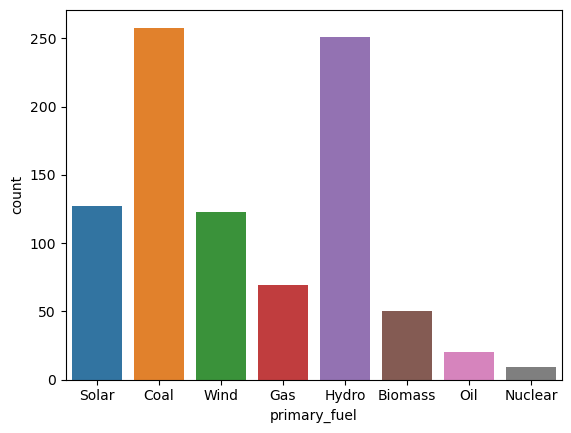

In [38]:
#checking the values for primary_fuel
sns.countplot(x="primary_fuel", data=df)

In [39]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [40]:
df['primary_fuel'].value_counts()

primary_fuel
Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: count, dtype: int64

coal and hydro has highest followed by solar,wind

# EDA EXPLORATARY DATA ANALYSIS

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2014'>

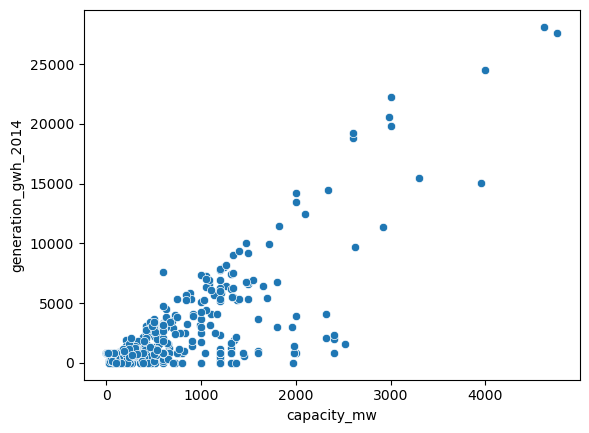

In [41]:
sns.scatterplot(x='capacity_mw',y='generation_gwh_2014',data=df)

we acn observe both are positively correlated 'capacity_mw' increase with increase in 'generation_gwh_2014'

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2015'>

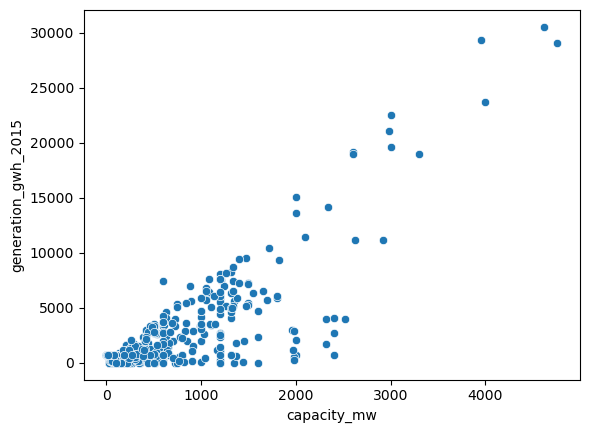

In [42]:
sns.scatterplot(x='capacity_mw',y='generation_gwh_2015',data=df)

we acn observe both are positively correlated 'capacity_mw' increase with increase in 'generation_gwh_2016'

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2017'>

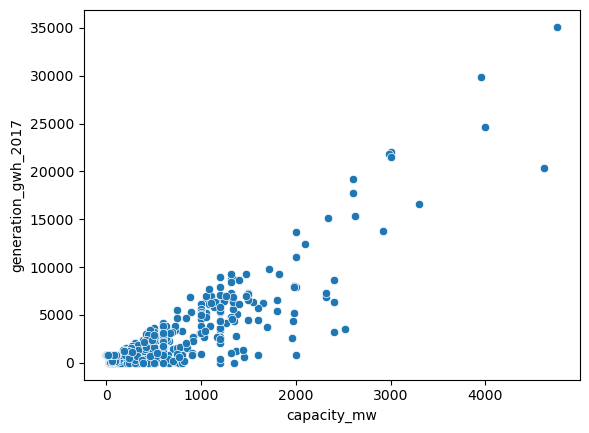

In [43]:
sns.scatterplot(x='capacity_mw',y='generation_gwh_2017',data=df)

we acn observe both are positively correlated 'capacity_mw' increase with increase in 'generation_gwh_2017'

<Axes: xlabel='capacity_mw', ylabel='generation_gwh_2018'>

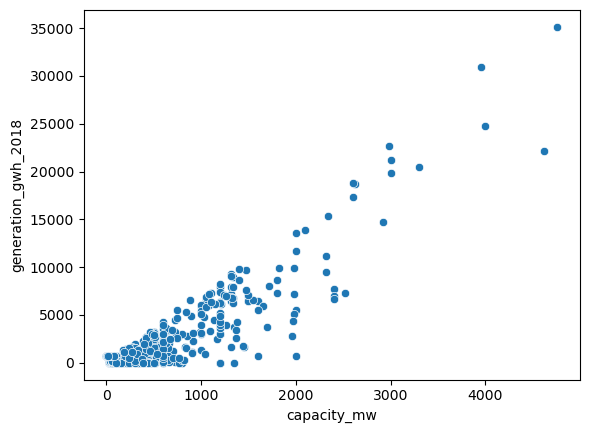

In [44]:
sns.scatterplot(x='capacity_mw',y='generation_gwh_2018',data=df)

we acn observe both are positively correlated 'capacity_mw' increase with increase in 'generation_gwh_2018'

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2014'>

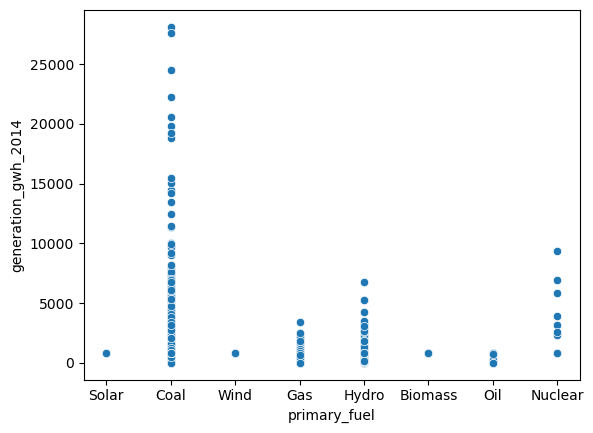

In [45]:
sns.scatterplot(x='primary_fuel',y='generation_gwh_2014',data=df)

coal is most used fuel type in 2014

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2015'>

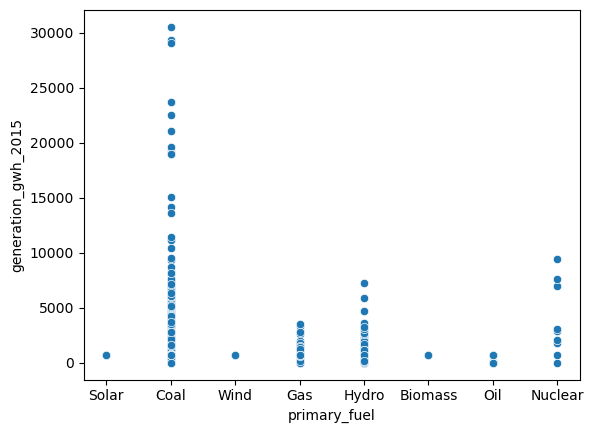

In [46]:
sns.scatterplot(x='primary_fuel',y='generation_gwh_2015',data=df)

coal is most used fuel type in 2015

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2016'>

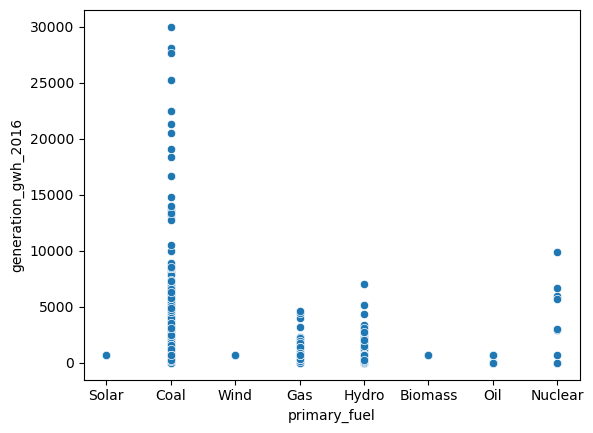

In [47]:
sns.scatterplot(x='primary_fuel',y='generation_gwh_2016',data=df)

coal is most used fuel type in 2016

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2017'>

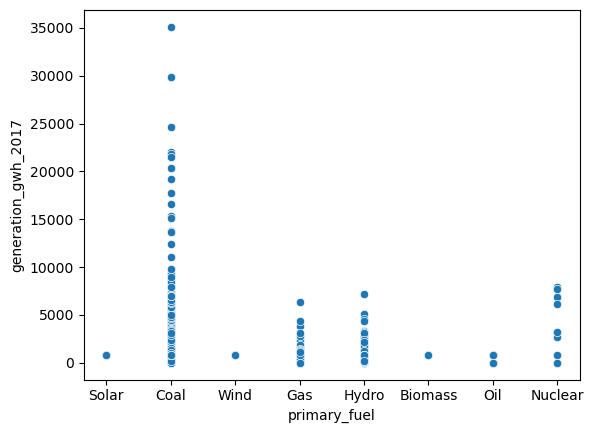

In [48]:
sns.scatterplot(x='primary_fuel',y='generation_gwh_2017',data=df)

coal is most used fuel type in 2017

<Axes: xlabel='primary_fuel', ylabel='generation_gwh_2018'>

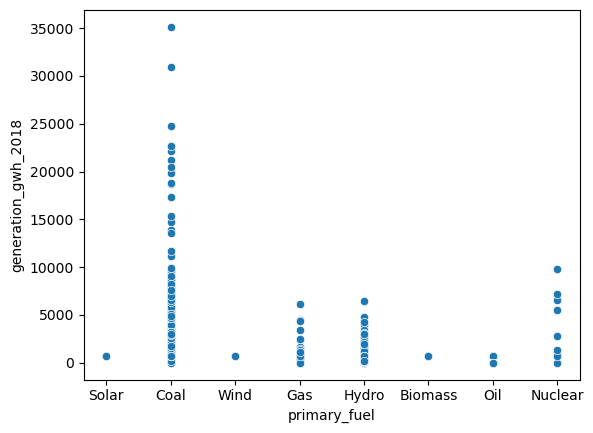

In [49]:
sns.scatterplot(x='primary_fuel',y='generation_gwh_2018',data=df)

coal is most used fuel type in 2018

In all of the year 2014 to 2018 the coal is most used fuel, Nuclear,Gas and hydro on average use and Solar,Wind Bomass nad oil was very less used

Using LabelEncoder for convering categorical to numerical

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [51]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [52]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]= LE.fit_transform(df[i].values.reshape(-1,1))
df   

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,2001.0,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,2001.0,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,22,2,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2001.0,77,0,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7,2001.0,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1,2001.0,59,2,801.123775,711.181225,737.205450,817.977250,751.644375


In [53]:
df['primary_fuel'].unique()

array([6, 1, 7, 2, 3, 0, 5, 4])

Detecting outliers

by using box-plot

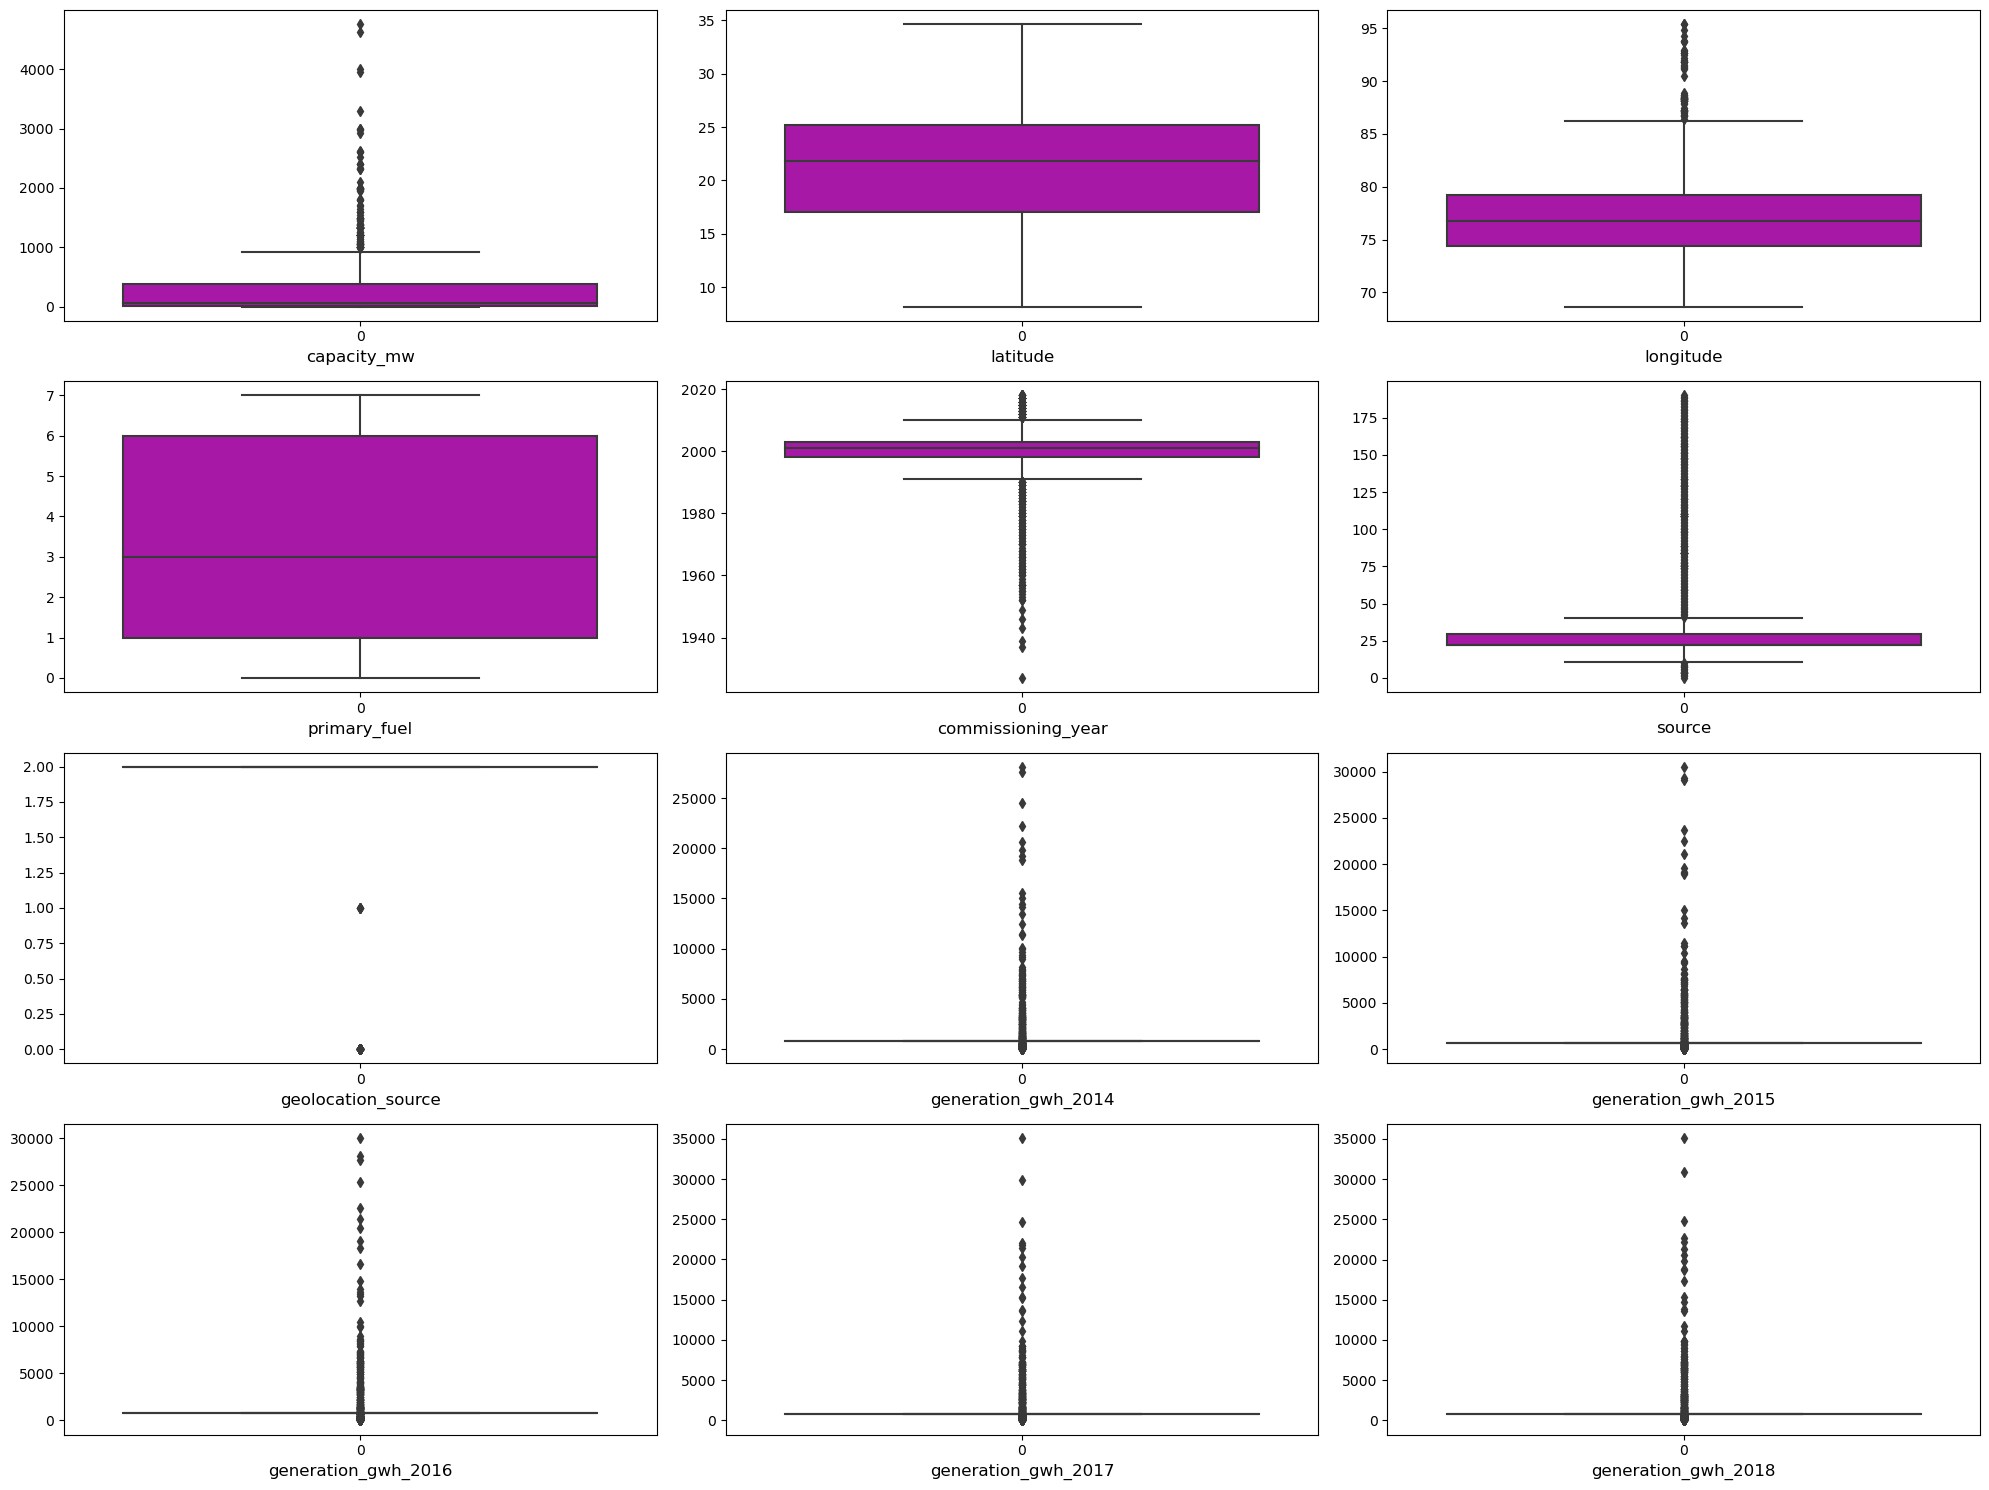

In [54]:
plt.figure(figsize=(20,15), facecolor= "white")
plotnumber = 1#iteration or index value
for col in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3, plotnumber)#subplot is used to plot diff plot on single image
        sns.boxplot(df[col], color="m")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation= 0, fontsize=10)
    plotnumber+=1
plt.tight_layout()   

most of the column have outliers  like ,'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2013','capacity_mw',longitude,source

In [55]:
from scipy.stats import zscore

z=np.abs(zscore(df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','capacity_mw','commissioning_year','source','longitude']]))
z

,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,capacity_mw,commissioning_year,source,longitude
0,0.257022,0.267783,0.275737,0.275565,0.288394,0.548908,0.933076,1.460215,0.869917
1,0.257022,0.267783,0.275737,0.275565,0.288394,0.386977,0.172699,2.917019,0.585590
2,0.257022,0.267783,0.275737,0.275565,0.288394,0.486679,0.172699,0.512075,1.673567
3,0.322873,0.223348,0.226194,0.326203,0.327990,0.324240,0.400812,0.489662,2.895239
4,0.545554,1.476964,1.557432,1.224379,1.772608,2.498942,1.237227,0.489662,1.035238
...,...,...,...,...,...,...,...,...,...
902,0.257022,0.505833,0.443415,0.259992,0.308963,2.159821,1.313265,0.489662,0.014609
903,0.257022,0.267783,0.275737,0.275565,0.288394,0.548060,0.172699,0.743019,0.153415
904,0.257022,0.267783,0.275737,0.275565,0.288394,0.509909,0.172699,0.512075,0.383592
905,0.257022,0.267783,0.275737,0.275565,0.288394,0.417498,0.172699,0.339596,0.764564


In [56]:
#threesold=3
np.where(z>3)

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
        147, 158, 179, 183, 191, 209, 209, 209, 209, 209, 209, 219, 222,
        244, 299, 308, 308, 308, 308, 308, 308, 321, 323, 333, 340, 342,
        345, 360, 363, 364, 364, 364, 364, 364, 364, 371, 375, 416, 427,
        444, 454, 478, 482, 482, 484, 493, 493, 493, 493, 493, 493, 494,
        494, 494, 494, 494, 494, 499, 519, 532, 538, 541, 546, 573, 577,
        583, 592, 601, 621, 623, 638, 648, 648, 648, 648, 648, 648, 657,
        657, 657, 657, 657, 657, 661, 669, 689, 695, 695, 695, 695, 695,
        695, 706, 709, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724,
        726, 726, 726, 726, 726, 726, 728, 767, 786, 786, 786, 786, 786,
        786, 788, 807, 808, 808, 808, 808, 808, 808, 818, 832, 847, 848,
        870, 871, 879, 880, 880, 880, 880, 880, 880, 895, 900], dtype=int64),
 array([1, 2, 3, 4, 5, 7, 7, 0, 1, 2, 3, 4, 5, 5, 0, 8, 8, 7, 0, 1, 2, 3,
        4, 5, 6, 6, 8, 7, 0, 1, 2, 3, 4, 5, 7

In [57]:
z.iloc[15,1]

3.231602995696999

In [58]:
#removoing the dataabove zscore and creating new df
df1=df[(z<3).all(axis=1)]
df1.shape

(831, 12)

In [59]:
#shape of old and new data
print("old data frame.--",df.shape[0])
print("new data frame.--",df1.shape[0])

old data frame.-- 907
new data frame.-- 831


In [60]:
print("data loss percentage--", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage-- 8.379272326350605


In [61]:
df1

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,2001.0,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,2001.0,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,22,2,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2001.0,77,0,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7,2001.0,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1,2001.0,59,2,801.123775,711.181225,737.205450,817.977250,751.644375


In [62]:
df=df1

In [63]:
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,2001.0,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,2001.0,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,22,2,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2001.0,77,0,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7,2001.0,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1,2001.0,59,2,801.123775,711.181225,737.205450,817.977250,751.644375


In [64]:
#checking skewness
df.skew()

capacity_mw            1.965300
latitude              -0.134941
longitude              0.938420
primary_fuel           0.407590
commissioning_year    -1.271016
source                 1.778820
geolocation_source    -2.098153
generation_gwh_2014    2.926464
generation_gwh_2015    2.726846
generation_gwh_2016    2.666192
generation_gwh_2017    2.565658
generation_gwh_2018    2.630570
dtype: float64

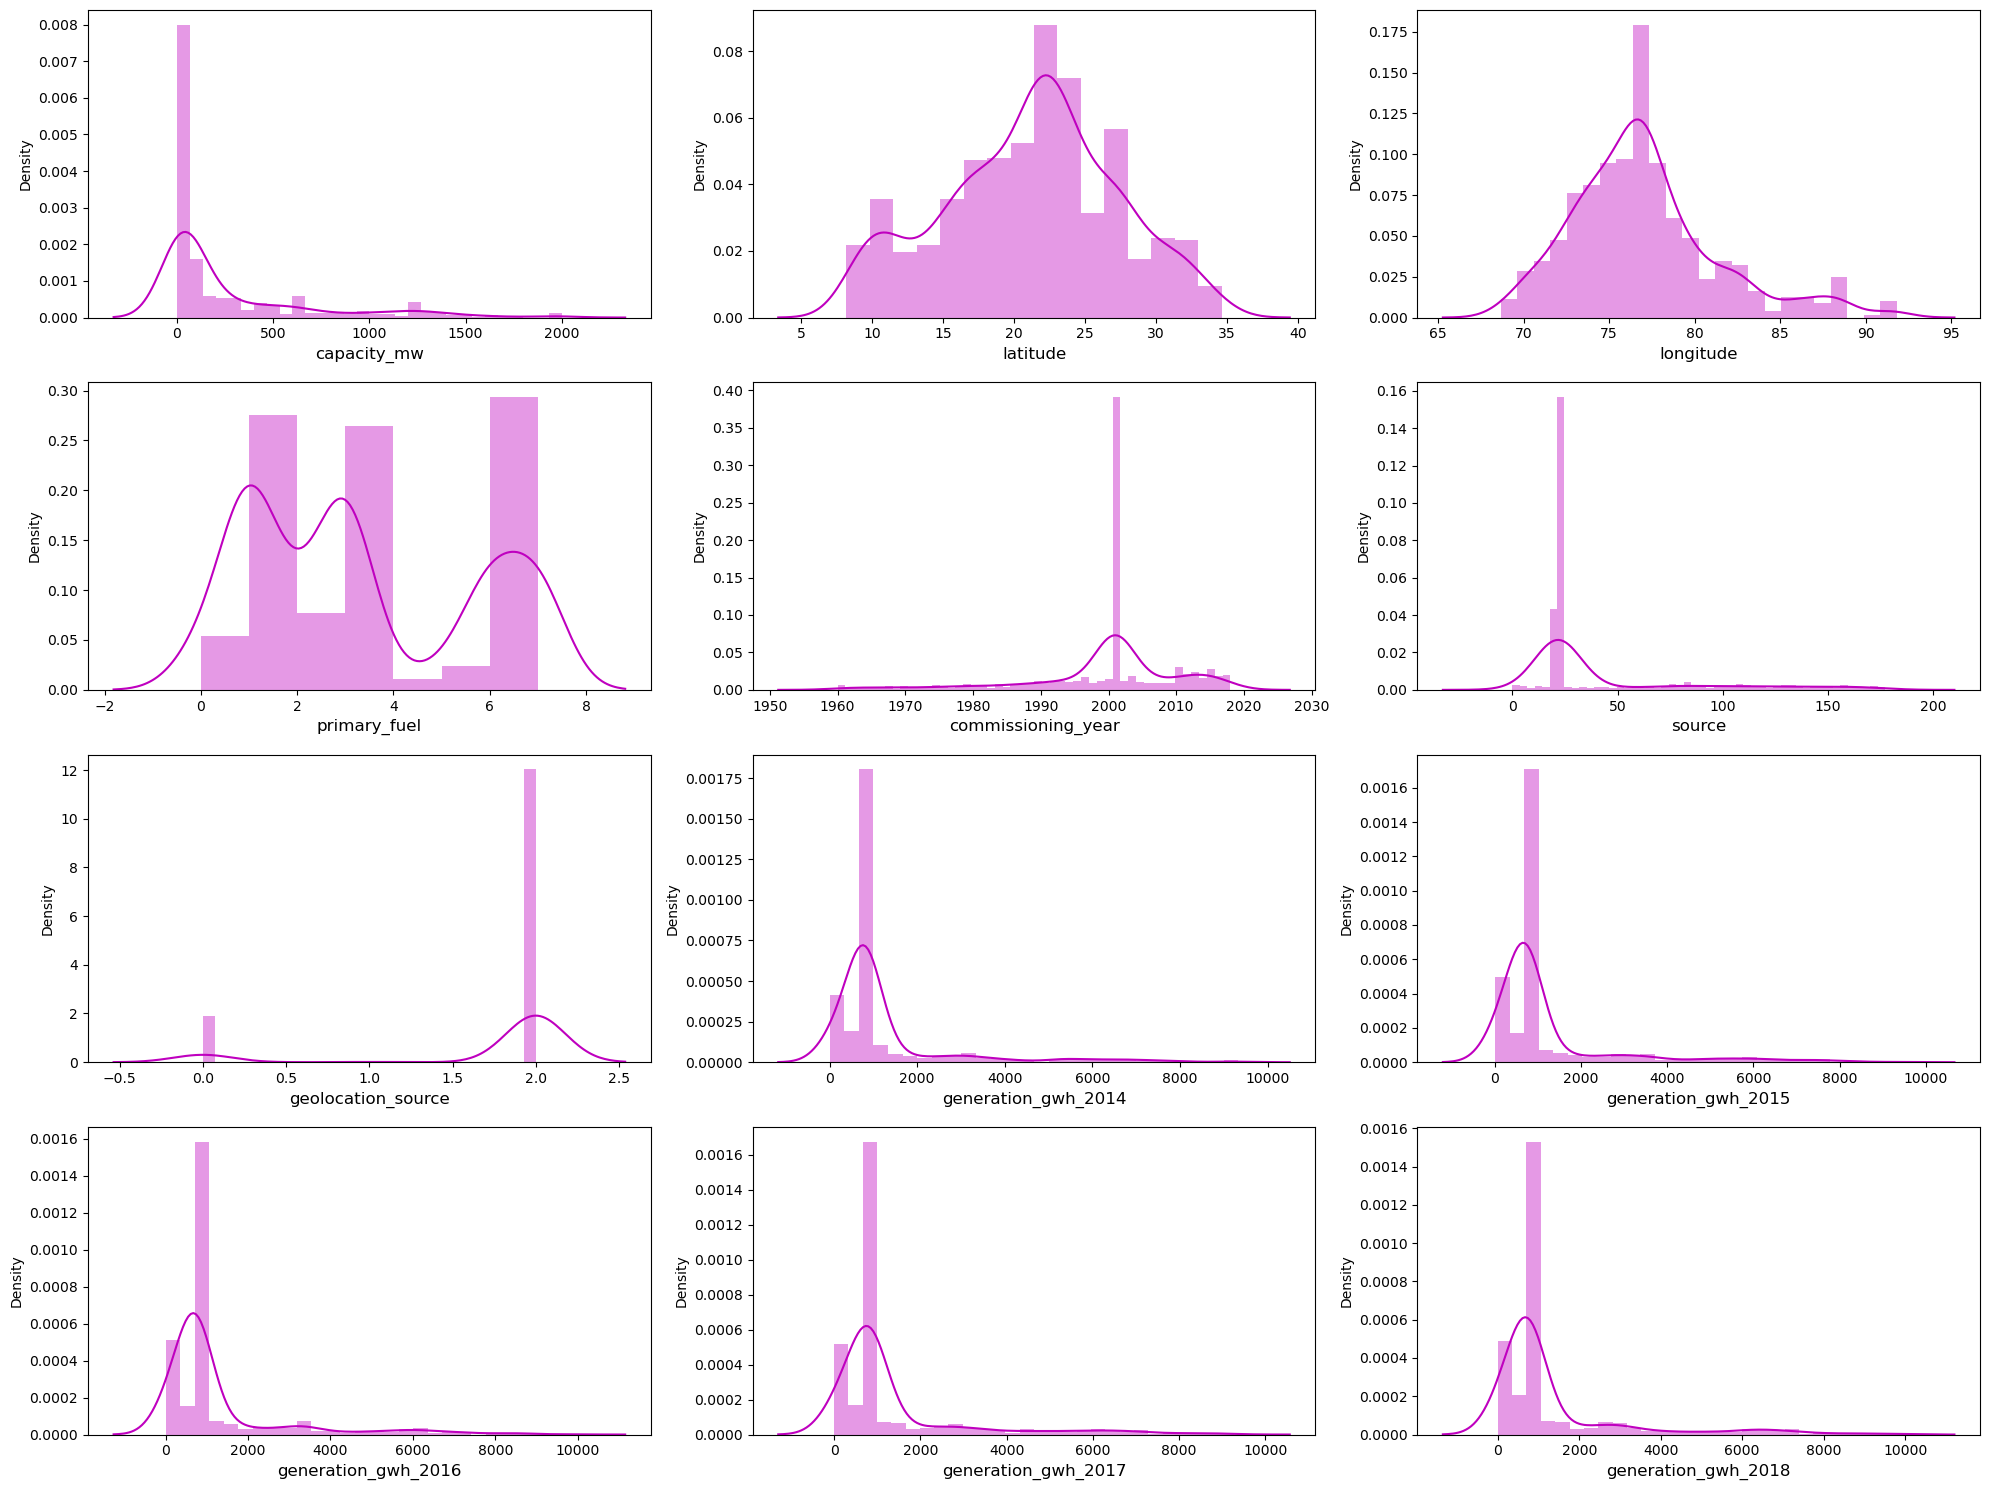

In [65]:
#lets check how data hss been distributed in remaing column-checking the column with inthe column
plt.figure(figsize=(20,15), facecolor= "white")
plotnumber = 1#iteration or index value
for col in df:
    if plotnumber<=12:
        ax=plt.subplot(4,3, plotnumber)#subplot is used to plot diff plot on single image
        sns.distplot(df[col], color="m")
        plt.xlabel(col,fontsize=12)
        plt.yticks(rotation= 0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

most of features have high skewness we want to remove it

In [66]:
#removing skewness using cuberoot method the acceptable range is -0.5 to +0.5
df["capacity_mw"]=np.cbrt(df["capacity_mw"])
df["generation_gwh_2014"]=np.cbrt(df["generation_gwh_2014"])
df["generation_gwh_2015"]=np.cbrt(df["generation_gwh_2015"])
df["generation_gwh_2016"]=np.cbrt(df["generation_gwh_2016"])
df["generation_gwh_2017"]=np.cbrt(df["generation_gwh_2017"])
df["generation_gwh_2018"]=np.cbrt(df["generation_gwh_2018"])

In [67]:
df.skew()

capacity_mw            0.813961
latitude              -0.134941
longitude              0.938420
primary_fuel           0.407590
commissioning_year    -1.271016
source                 1.778820
geolocation_source    -2.098153
generation_gwh_2014    0.306174
generation_gwh_2015    0.439952
generation_gwh_2016    0.416673
generation_gwh_2017    0.278359
generation_gwh_2018    0.355746
dtype: float64

skewmess is reduced im some columns

Finding the correlation between the target variable and independent variable if there is any multicolinearity

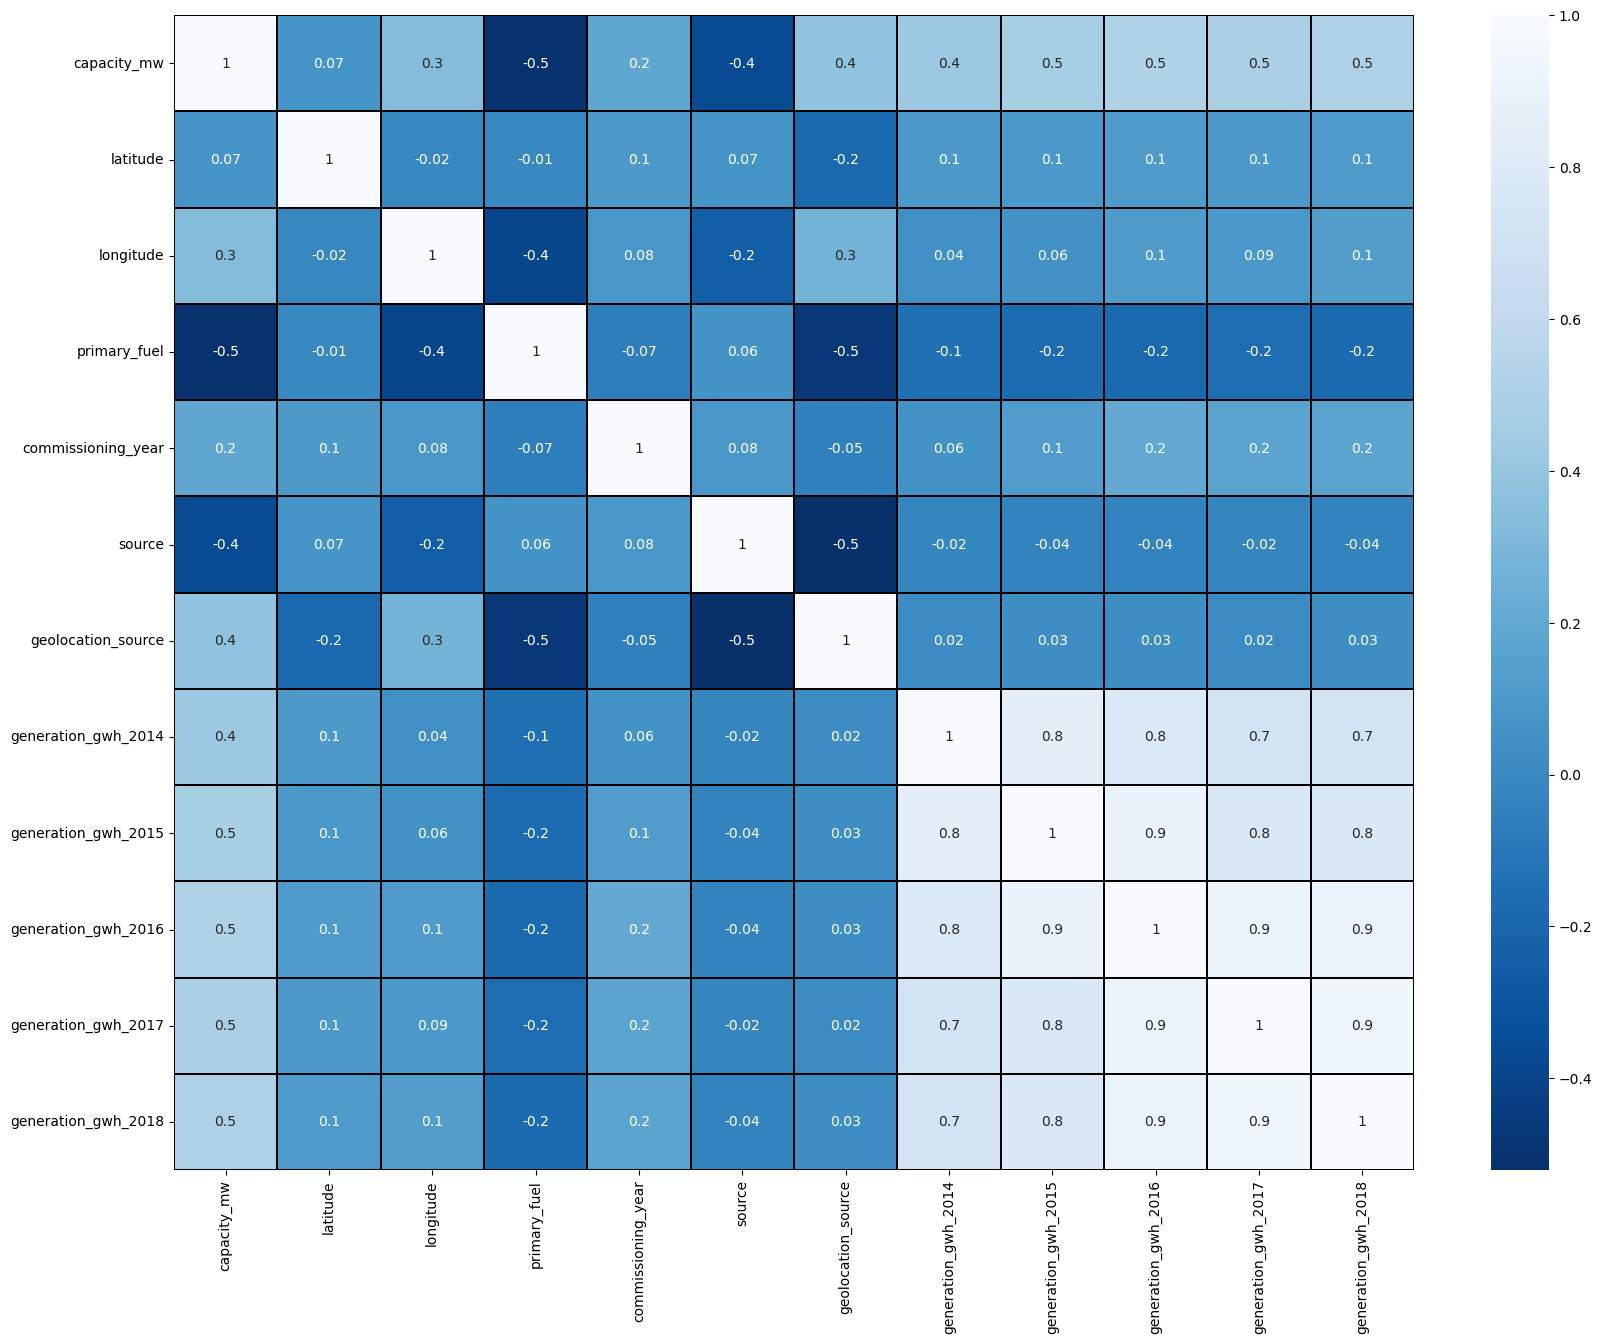

In [68]:
#by using heatmap checking the correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1,fmt='.1g', linecolor="black", annot=True, cmap="Blues_r")
plt.show()

generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018 are highly positively correlated eith each other

# First taking 'capacity_mw' as target variableand  creating Regression model

In [69]:
#Seperating the label and features¶
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']

In [70]:
print(x.shape)
print(y.shape)

(831, 11)
(831,)


# feature scaling using standardscaler

In [71]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)# after the scaling the output in arrarys so keep in dataframe
x

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,1.152976,-0.877762,1.166969,1.010661,1.569568,-1.052547,-0.048963,-0.071815,-0.071691,-0.045970,-0.074542
1,0.594336,-0.560605,-0.991872,0.118143,3.111110,0.402805,-0.048963,-0.071815,-0.071691,-0.045970,-0.074542
2,0.126433,-1.774209,1.598738,0.118143,-0.517443,0.402805,-0.048963,-0.071815,-0.071691,-0.045970,-0.074542
3,0.448023,3.322148,-0.560104,0.385898,-0.493727,0.402805,-0.266293,0.068596,0.077997,-0.207185,-0.208792
4,0.135668,1.247377,-0.991872,1.367668,-0.493727,0.402805,1.415150,2.385925,2.387436,2.049486,2.498818
...,...,...,...,...,...,...,...,...,...,...,...
826,-0.790396,0.076307,-0.991872,1.456920,-0.493727,0.402805,-0.048963,-2.198861,-0.825436,-0.000518,-0.142240
827,-1.346437,0.263732,1.166969,0.118143,0.810655,-2.507900,-0.048963,-0.071815,-0.071691,-0.045970,-0.074542
828,-0.956978,-0.335282,1.598738,0.118143,-0.517443,0.402805,-0.048963,-0.071815,-0.071691,-0.045970,-0.074542
829,0.526288,-0.760245,-0.991872,0.118143,0.383766,0.402805,-0.048963,-0.071815,-0.071691,-0.045970,-0.074542


# MODEL BUILDING:¶

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [73]:
LR=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    LR.fit(x_train,y_train)
    LR_predict_train=LR.predict(x_train)
    LR_predict_test=LR.predict(x_test)
    print(f'At random state {i}, The test accuracy is: {r2_score(y_test,LR_predict_test)}')
    print('\n')

At random state 0, The test accuracy is: 0.4128739530617943


At random state 1, The test accuracy is: 0.5406780508624223


At random state 2, The test accuracy is: 0.6405577873633185


At random state 3, The test accuracy is: 0.457614977497132


At random state 4, The test accuracy is: 0.5719430148743918


At random state 5, The test accuracy is: 0.5898610222127412


At random state 6, The test accuracy is: 0.6373806642798042


At random state 7, The test accuracy is: 0.49657627629207235


At random state 8, The test accuracy is: 0.5540768319379112


At random state 9, The test accuracy is: 0.5647761486654291


At random state 10, The test accuracy is: 0.5739409246552334


At random state 11, The test accuracy is: 0.5972844866837632


At random state 12, The test accuracy is: 0.5263020297556535


At random state 13, The test accuracy is: 0.5081103886960618


At random state 14, The test accuracy is: 0.5806108915126705


At random state 15, The test accuracy is: 0.4534135654994037


At

random state=92 giving highest accuracy, choosing that as random state

In [74]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=92)

In [75]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(623, 11)
(623,)
(208, 11)
(208,)


In [76]:
models=[LinearRegression(),DecisionTreeRegressor(),KNN(),RandomForestRegressor(),
        GradientBoostingRegressor(),SVR()]

In [77]:
def r2score_train_test():
    
    for model in models:
        model.fit(x_train,y_train)
        y_train_pred = model.predict(x_train)
        y_test_pred =model.predict(x_test)
        
        
    
        print(model)
        print('r2 Score for the training',  '=', r2_score(y_train,y_train_pred)*100)
        print('r2 Score for the testing', '=',  r2_score(y_test,y_test_pred)*100)
        print('Mean Absolute Error:',  '=',  mean_absolute_error(y_test,y_test_pred))
        print('Mean squared Error:', '=',  mean_squared_error(y_test,y_test_pred))
        print('Root Mean square Error:', '=',   np.sqrt(mean_squared_error(y_test,y_test_pred))) 
        print('-'*30)  
        print("\n")

In [78]:
r2score_train_test()

LinearRegression()
r2 Score for the training = 53.29312481150475
r2 Score for the testing = 65.88624331871378
Mean Absolute Error: = 1.3955007532894994
Mean squared Error: = 3.0514167526473903
Root Mean square Error: = 1.746830487668277
------------------------------


DecisionTreeRegressor()
r2 Score for the training = 99.7236484167935
r2 Score for the testing = 75.99542895038802
Mean Absolute Error: = 0.9895212249410977
Mean squared Error: = 2.1471675173517957
Root Mean square Error: = 1.465321642968463
------------------------------


KNeighborsRegressor()
r2 Score for the training = 83.74332635468514
r2 Score for the testing = 78.27039520133894
Mean Absolute Error: = 1.0086961785180568
Mean squared Error: = 1.9436757062705736
Root Mean square Error: = 1.3941577049496852
------------------------------


RandomForestRegressor()
r2 Score for the training = 97.24476588297092
r2 Score for the testing = 85.59546729162986
Mean Absolute Error: = 0.8299694971377214
Mean squared Error: = 1.2

KNeighborsRegressor(),RandomForestRegressor(),GradientBoostingRegressor() have better test results by checking the cross valiadation score we canform

In [79]:
from sklearn.model_selection import cross_val_score

In [80]:
def compare_models_cross_validation():
    
    for model in models:
        
        cv_score = cross_val_score(model, x, y, cv=5)
        r2_accuracy = sum(cv_score)/len(cv_score)
        r2_accuracy = r2_accuracy*100
        
        
        print('Cross Validation Score for the', model, '=', cv_score)
        print('r2 Accuracy  of the', model, '=', r2_accuracy,'%')
        print('-'*30) 
        print("\n") 

In [81]:
compare_models_cross_validation()

Cross Validation Score for the LinearRegression() = [0.52273127 0.53190949 0.4900433  0.5915462  0.56706176]
r2 Accuracy  of the LinearRegression() = 54.06584046376304 %
------------------------------


Cross Validation Score for the DecisionTreeRegressor() = [0.73808803 0.65053967 0.67778611 0.71980068 0.69844563]
r2 Accuracy  of the DecisionTreeRegressor() = 69.69320249008648 %
------------------------------


Cross Validation Score for the KNeighborsRegressor() = [0.75637085 0.75875783 0.72797198 0.82804309 0.746676  ]
r2 Accuracy  of the KNeighborsRegressor() = 76.35639508229828 %
------------------------------


Cross Validation Score for the RandomForestRegressor() = [0.83007806 0.8581989  0.79097765 0.86468863 0.83940161]
r2 Accuracy  of the RandomForestRegressor() = 83.66689686524458 %
------------------------------


Cross Validation Score for the GradientBoostingRegressor() = [0.82739734 0.86580382 0.80532485 0.82843443 0.84277913]
r2 Accuracy  of the GradientBoostingRegresso

In [82]:
#difference between models and cross validation score
print("Diff between r2_score and cross_validation score  for LinearRegression is =",  65.88 -54.06)
print("Diff between r2_score and cross_validation score  for DecisionTreeRegressor is =",   73.89 -70.21)
print("Diff between r2_score and cross_validation score  for KNeighborsRegressor is =",  78.27 -76.35)
print("Diff between r2_score and cross_validation score  for RandomForestRegressor is =",  86.33 -83.63)
print("Diff between r2_score and cross_validation score  for GradientBoostingRegressor is =",  83.16-83.38)
print("Diff between r2_score and cross_validation score  for SVR is =", 77.96 -75.15)

Diff between r2_score and cross_validation score  for LinearRegression is = 11.819999999999993
Diff between r2_score and cross_validation score  for DecisionTreeRegressor is = 3.680000000000007
Diff between r2_score and cross_validation score  for KNeighborsRegressor is = 1.9200000000000017
Diff between r2_score and cross_validation score  for RandomForestRegressor is = 2.700000000000003
Diff between r2_score and cross_validation score  for GradientBoostingRegressor is = -0.21999999999999886
Diff between r2_score and cross_validation score  for SVR is = 2.809999999999988


# GradientBoostingRegressor is the best model

# HYPER PARAMETER TUNING:

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
parameters ={ 
             'min_samples_leaf':[1,2], 
              'learning_rate':[0.01,0.1],'n_estimators':[10,50,100],'max_depth':[2,3,5],
             'min_impurity_decrease':[0.0,0.1],'loss':['squared_error','absolute_error','huber'],
             'criterion':['friedman_mse','squared_error'],
            }

In [85]:
GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5,scoring='accuracy')

In [86]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1],
                         'loss': ['squared_error', 'absolute_error', 'huber'],
                         'max_depth': [2, 3, 5],
                         'min_impurity_decrease': [0.0, 0.1],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [87]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.01,
 'loss': 'squared_error',
 'max_depth': 2,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'n_estimators': 10}

In [89]:
best_model=GradientBoostingRegressor(criterion='friedman_mse',n_estimators=100,max_depth=2,min_impurity_decrease=0.0,)
best_model.fit(x_train,y_train)
pred=best_model.predict(x_test)
print('r2 Score for the testing', '=',  r2_score(y_test,pred)*100)
print('Mean Absolute Error:',  '=',  mean_absolute_error(y_test,pred))
print('Mean squared Error:', '=',  mean_squared_error(y_test,pred))
print('Root Mean square Error:', '=',   np.sqrt(mean_squared_error(y_test,pred))) 

r2 Score for the testing = 86.11799805055367
Mean Absolute Error: = 0.8736775580732702
Mean squared Error: = 1.2417211538611217
Root Mean square Error: = 1.1143254254754855


after performing r2_score the accuracy increases from 83.33 to 86.11

In [90]:
#saving model using .pkl
import joblib
joblib.dump(best_model ,"global.pkl")

['global.pkl']

# TAKING 'primary_fuel' AS TARGET , CREATING CLASSIFICATION MODEL

Dividing data into X and Y¶

In [91]:
xc=df.drop(['primary_fuel'],axis=1)
yc=df['primary_fuel']

In [92]:
print(xc.shape)
print(yc.shape)

(831, 11)
(831,)


In [94]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
maxAccu=0
maxRS=0
for i in range(1,200):
    xc_train, xc_test, yc_train, yc_test = train_test_split(xc,yc, test_size=0.30, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(xc_train,yc_train)
    pred=RFR.predict(xc_test)
    acc= accuracy_score(yc_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS= i
print("Best accuracy is", maxAccu, "at random_state", maxRS)

Best accuracy is 0.904 at random_state 21


In [95]:
xc_train,xc_test,yc_train,yc_test=train_test_split(xc,yc,test_size=.3,random_state=21)

In [104]:
models={"LogisticRegression":LogisticRegression(),
         "AdaBoostClassifier":AdaBoostClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),"BaggingClassifier":BaggingClassifier(),
           "RandomForestClassifier":RandomForestClassifier(),
             "support vector mach":SVC(),"Decision tree classifier":DecisionTreeClassifier()
       }
                                
for i in range(len(list(models))):
       model= list(models.values())[i]
       model.fit(xc_train,yc_train)#train model
        
        # making predictions
       yc_train_pred = model.predict(xc_train)
       yc_test_pred =model.predict(xc_test)
        
        
        #Training set performance
       model_train_accuracy = accuracy_score(yc_train,yc_train_pred)
       model_train_f1    =   f1_score(yc_train,yc_train_pred,average='micro')
       model_train_precision = precision_score(yc_train,yc_train_pred,average='micro')
       model_train_recall =   recall_score(yc_train,yc_train_pred,average='micro')    
     
                                        
                                        
          #Test set performance
       model_test_accuracy = accuracy_score(yc_test,yc_test_pred)
       model_test_f1    =   f1_score(yc_test,yc_test_pred,average='micro')
       model_test_precision = precision_score(yc_test,yc_test_pred,average='micro')
       model_test_recall =   recall_score(yc_test,yc_test_pred,average='micro')   
      
                                         
       print(list(models.keys())[i]) 
                                        
                                        
       print("Model performance for Training set")
       print("-- Accuracy: {:.4f}".format(model_train_accuracy))       
       print("-- F1: {:.4f}".format(model_train_f1))                                 
       print("-- Precision: {:.4f}".format(model_train_precision))                                 
       print("-- Recalll: {:.4f}".format(model_train_recall))                                 
     
                                     
                                     
                                        
                                        
       print("Model performance for Test set")
       print("-- Accuracy: {:.4f}".format(model_test_accuracy))       
       print("-- F1: {:.4f}".format(model_test_f1))                                 
       print("-- Precision: {:.4f}".format(model_test_precision))                                 
       print("-- Recalll: {:.4f}".format(model_test_recall))                                 
       
                                        
       print('-'*30) 
       print("\n")   
                                        

LogisticRegression
Model performance for Training set
-- Accuracy: 0.5250
-- F1: 0.5250
-- Precision: 0.5250
-- Recalll: 0.5250
Model performance for Test set
-- Accuracy: 0.5440
-- F1: 0.5440
-- Precision: 0.5440
-- Recalll: 0.5440
------------------------------


AdaBoostClassifier
Model performance for Training set
-- Accuracy: 0.5938
-- F1: 0.5938
-- Precision: 0.5938
-- Recalll: 0.5938
Model performance for Test set
-- Accuracy: 0.6640
-- F1: 0.6640
-- Precision: 0.6640
-- Recalll: 0.6640
------------------------------


GradientBoostingClassifier
Model performance for Training set
-- Accuracy: 1.0000
-- F1: 1.0000
-- Precision: 1.0000
-- Recalll: 1.0000
Model performance for Test set
-- Accuracy: 0.8640
-- F1: 0.8640
-- Precision: 0.8640
-- Recalll: 0.8640
------------------------------


BaggingClassifier
Model performance for Training set
-- Accuracy: 0.9931
-- F1: 0.9931
-- Precision: 0.9931
-- Recalll: 0.9931
Model performance for Test set
-- Accuracy: 0.8720
-- F1: 0.8720
--

In [111]:
models=[AdaBoostClassifier(),GradientBoostingClassifier(),SVC(),BaggingClassifier(),RandomForestClassifier(),DecisionTreeClassifier()]

In [112]:
def compare_models_cross_validation():
    
    for model in models:
        
        cv_score = cross_val_score(model, xc, yc, cv=5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy = mean_accuracy*100
        
        
        print('Cross Validation Score for the', model, '=', cv_score)
        print('Mean Accuracy  of the', model, '=', mean_accuracy,'%')
        print('-'*30) 
        print("\n") 

In [113]:
compare_models_cross_validation()

Cross Validation Score for the AdaBoostClassifier() = [0.46107784 0.64457831 0.62048193 0.45180723 0.59638554]
Mean Accuracy  of the AdaBoostClassifier() = 55.486617127191394 %
------------------------------


Cross Validation Score for the GradientBoostingClassifier() = [0.85628743 0.87349398 0.86746988 0.8253012  0.84939759]
Mean Accuracy  of the GradientBoostingClassifier() = 85.43900151504221 %
------------------------------


Cross Validation Score for the SVC() = [0.26946108 0.27710843 0.27710843 0.27710843 0.27710843]
Mean Accuracy  of the SVC() = 27.557896255681403 %
------------------------------


Cross Validation Score for the BaggingClassifier() = [0.80239521 0.8313253  0.87951807 0.81325301 0.8313253 ]
Mean Accuracy  of the BaggingClassifier() = 83.15633792655652 %
------------------------------


Cross Validation Score for the RandomForestClassifier() = [0.82035928 0.86746988 0.87951807 0.8313253  0.84337349]
Mean Accuracy  of the RandomForestClassifier() = 84.84092056850

In [114]:
#difference between models and cross validation score
print("Diff between Accuracy score and cross_validation score  for AdaBoostClassifier is =",   66.40 -55.48)
print("Diff between Accuracy score and cross_validation score  for GradientBoostingClassifier is =",  86.40 -85.43)
print("Diff between Accuracy score and cross_validation score  for BaggingClassifier is =",  87.20 -83.15)
print("Diff between Accuracy score and cross_validation score  for RandomForestClassifier is =",  90.00-84.84)
print("Diff between Accuracy score and cross_validation score  for DecisionTreeClassifier is =", 85.20 -77.74)
print("Diff between Accuracy score and cross_validation score  for support vector machine is =", 24.80 -27.54)

Diff between Accuracy score and cross_validation score  for AdaBoostClassifier is = 10.920000000000009
Diff between Accuracy score and cross_validation score  for GradientBoostingClassifier is = 0.9699999999999989
Diff between Accuracy score and cross_validation score  for BaggingClassifier is = 4.049999999999997
Diff between Accuracy score and cross_validation score  for RandomForestClassifier is = 5.159999999999997
Diff between Accuracy score and cross_validation score  for DecisionTreeClassifier is = 7.460000000000008
Diff between Accuracy score and cross_validation score  for support vector machine is = -2.7399999999999984


# GradientBoostingClassifier is the best model

HYPER PARAMETER TUNING:

In [115]:
from sklearn.model_selection import GridSearchCV

In [119]:
parameters ={ 
             'min_samples_leaf':[1,2], 
              'learning_rate':[0.01,0.1],'n_estimators':[100,200],'max_depth':[2,5],
             'min_impurity_decrease':[0.0,0.1],
             'criterion':['friedman_mse','squared_error'],
            }

In [120]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=10,scoring='accuracy')

In [121]:
GCV.fit(xc_train,yc_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1], 'max_depth': [2, 5],
                         'min_impurity_decrease': [0.0, 0.1],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [122]:
GCV.best_params_

{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'n_estimators': 200}

In [134]:
final_model=GradientBoostingClassifier(criterion='squared_error',
                                   max_depth=4,min_impurity_decrease=0.0,n_estimators=175)
final_model.fit(xc_train,yc_train)
pred=final_model.predict(xc_test)
acc= accuracy_score(yc_test,pred)
print(acc*100)

86.0


In [135]:
print("CLASSIFICATION REPORT::\n",classification_report(yc_test,pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.67      0.53      0.59        15
           1       0.71      0.84      0.77        62
           2       0.69      0.60      0.64        15
           3       0.92      0.92      0.92        77
           4       0.00      0.00      0.00         1
           5       1.00      0.43      0.60         7
           6       1.00      0.97      0.98        33
           7       1.00      1.00      1.00        40

    accuracy                           0.86       250
   macro avg       0.75      0.66      0.69       250
weighted avg       0.86      0.86      0.86       250



after performing hyper parameter tuning 

PLOTTING ROC AND AUC 

In [137]:
#saving model using .pkl
import joblib
joblib.dump(final_model,"global_classification.pkl")

['global_classification.pkl']